<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-8/Act3_6_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.6: Regresión No Lineal (Airbnb - Mexico)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

In [3]:
data = pd.read_csv('Mexico_listings_clean.csv',encoding='utf-8',index_col=0)
data.shape

(26536, 60)

In [4]:
valores_nulos = data.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,0
host_name,0
host_since,0
host_location,0
host_response_time,0
host_is_superhost,0
host_verifications,0


In [5]:
#Coeficientes de Correlación Lineales
data_cuant = data.copy()

In [6]:
data_cuant.drop(['last_scraped','source','name','description','host_name','host_since','host_location','host_response_time','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','amenities','has_availability','calendar_last_scraped','first_review','last_review','host_is_superhost','room_type','instant_bookable'],axis=1,inplace=True)
data_cuant.shape

(26536, 39)

In [7]:
data_cuant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26536 entries, 0 to 26535
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   accommodates                                  26536 non-null  float64
 1   bathrooms                                     26536 non-null  float64
 2   bedrooms                                      26536 non-null  float64
 3   beds                                          26536 non-null  float64
 4   availability_30                               26536 non-null  int64  
 5   number_of_reviews_l30d                        26536 non-null  float64
 6   review_scores_rating                          26536 non-null  float64
 7   review_scores_accuracy                        26536 non-null  float64
 8   review_scores_cleanliness                     26536 non-null  float64
 9   review_scores_checkin                         26536 non-null  floa

In [8]:
corr_factors = data_cuant.corr()
corr_factors

,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
accommodates,1.000000,0.408699,0.626502,0.515751,-0.078011,0.088168,0.016101,0.030439,0.012736,-0.019377,0.012049,-0.002501,0.017545,NaN,0.137841,0.097354,0.083836,0.081068,-0.037118,0.058784,0.041519,0.078021,0.070431,-0.058333,-0.045208,-0.003670,0.157360,-0.008593,0.169043,-0.314961,0.008623,0.013774,0.370962,0.033146,0.126063,0.006845,0.074093,0.079344,0.079115
bathrooms,0.408699,1.000000,0.473770,0.234391,-0.008069,0.050404,0.049001,0.046662,0.031940,0.014978,0.021459,0.054031,0.050810,NaN,0.064057,0.043547,0.051053,0.020356,-0.103296,0.061407,0.041539,0.091797,0.071136,0.012488,0.029582,0.069565,0.082264,0.014020,0.057451,-0.141301,0.013316,0.021479,0.235566,0.002140,0.051185,-0.026211,0.026671,0.033949,0.031703
bedrooms,0.626502,0.473770,1.000000,0.485434,-0.155217,0.008463,0.036205,0.044727,0.020892,0.011301,0.022621,0.017494,0.048849,NaN,0.034449,-0.007472,-0.034803,0.004096,-0.042576,0.103181,0.087958,0.110903,0.112872,-0.163123,-0.163312,-0.117164,0.022256,-0.097635,0.040389,-0.211925,-0.083751,-0.071425,0.376110,0.012526,0.017971,-0.035627,0.022361,0.020022,0.023469
beds,0.515751,0.234391,0.485434,1.000000,-0.157191,-0.005420,0.002547,0.012585,0.003807,-0.017859,0.005924,-0.020853,0.003883,NaN,0.014810,-0.015908,-0.005096,0.012584,-0.010314,0.072263,0.067170,0.087986,0.088494,-0.162828,-0.163247,-0.087335,0.059718,-0.036372,0.068001,-0.177721,-0.032740,-0.033666,0.320860,0.071883,0.096087,-0.046192,0.101777,0.105057,0.105973
availability_30,-0.078011,-0.008069,-0.155217,-0.157191,1.000000,0.025487,-0.061938,-0.068153,-0.046783,-0.060459,-0.067670,-0.041087,-0.076689,NaN,0.011799,0.020225,0.030293,0.023832,0.015591,-0.151273,-0.135302,-0.122755,-0.155111,0.933003,0.867976,0.463635,-0.025754,0.067420,-0.010753,0.071384,0.059383,0.057917,-0.083578,-0.056834,-0.068929,0.115932,-0.090848,-0.082668,-0.087328
number_of_reviews_l30d,0.088168,0.050404,0.008463,-0.005420,0.025487,1.000000,0.035399,0.029414,0.036675,0.010591,0.030948,0.009437,0.035025,NaN,0.368781,0.172191,0.150069,0.060369,0.005236,0.011503,-0.008515,0.003797,0.013055,0.068693,0.090016,0.073940,0.436299,0.043129,0.104540,-0.081409,0.047616,0.052842,-0.039974,0.008375,0.257433,0.002292,0.092766,0.100209,0.099535
review_scores_rating,0.016101,0.049001,0.036205,0.002547,-0.061938,0.035399,1.000000,0.682841,0.601589,0.521760,0.572968,0.356720,0.695831,NaN,-0.115804,0.052045,-0.025031,-0.049106,-0.013873,0.104056,0.097460,0.084167,0.103316,-0.062178,-0.055360,-0.071665,-0.024616,-0.125241,-0.071993,-0.022518,-0.114537,-0.114866,0.067258,-0.069203,-0.059158,-0.047275,-0.050041,-0.058491,-0.055889
review_scores_accuracy,0.030439,0.046662,0.044727,0.012585,-0.068153,0.029414,0.682841,1.000000,0.553236,0.529878,0.564030,0.368623,0.641182,NaN,-0.150030,0.041875,-0.020039,-0.038649,-0.017512,0.106877,0.102198,0.087481,0.103601,-0.066381,-0.059437,-0.067411,-0.042505,-0.110161,-0.045951,-0.049488,-0.102279,-0.102843,0.083601,-0.055260,-0.065619,-0.047917,-0.038705,-0.044975,-0.042738
review_scores_cleanliness,0.012736,0.031940,0.020892,0.003807,-0.046783,0.036675,0.601589,0.553236,1.000000,0.434966,0.456313,0.294737,0.541435,NaN,-0.098617,0.058118,0.003512,-0.038932,-0.018452,0.071305,0.

In [9]:
corr_factors1 = abs(corr_factors)
corr_factors1

,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
accommodates,1.000000,0.408699,0.626502,0.515751,0.078011,0.088168,0.016101,0.030439,0.012736,0.019377,0.012049,0.002501,0.017545,NaN,0.137841,0.097354,0.083836,0.081068,0.037118,0.058784,0.041519,0.078021,0.070431,0.058333,0.045208,0.003670,0.157360,0.008593,0.169043,0.314961,0.008623,0.013774,0.370962,0.033146,0.126063,0.006845,0.074093,0.079344,0.079115
bathrooms,0.408699,1.000000,0.473770,0.234391,0.008069,0.050404,0.049001,0.046662,0.031940,0.014978,0.021459,0.054031,0.050810,NaN,0.064057,0.043547,0.051053,0.020356,0.103296,0.061407,0.041539,0.091797,0.071136,0.012488,0.029582,0.069565,0.082264,0.014020,0.057451,0.141301,0.013316,0.021479,0.235566,0.002140,0.051185,0.026211,0.026671,0.033949,0.031703
bedrooms,0.626502,0.473770,1.000000,0.485434,0.155217,0.008463,0.036205,0.044727,0.020892,0.011301,0.022621,0.017494,0.048849,NaN,0.034449,0.007472,0.034803,0.004096,0.042576,0.103181,0.087958,0.110903,0.112872,0.163123,0.163312,0.117164,0.022256,0.097635,0.040389,0.211925,0.083751,0.071425,0.376110,0.012526,0.017971,0.035627,0.022361,0.020022,0.023469
beds,0.515751,0.234391,0.485434,1.000000,0.157191,0.005420,0.002547,0.012585,0.003807,0.017859,0.005924,0.020853,0.003883,NaN,0.014810,0.015908,0.005096,0.012584,0.010314,0.072263,0.067170,0.087986,0.088494,0.162828,0.163247,0.087335,0.059718,0.036372,0.068001,0.177721,0.032740,0.033666,0.320860,0.071883,0.096087,0.046192,0.101777,0.105057,0.105973
availability_30,0.078011,0.008069,0.155217,0.157191,1.000000,0.025487,0.061938,0.068153,0.046783,0.060459,0.067670,0.041087,0.076689,NaN,0.011799,0.020225,0.030293,0.023832,0.015591,0.151273,0.135302,0.122755,0.155111,0.933003,0.867976,0.463635,0.025754,0.067420,0.010753,0.071384,0.059383,0.057917,0.083578,0.056834,0.068929,0.115932,0.090848,0.082668,0.087328
number_of_reviews_l30d,0.088168,0.050404,0.008463,0.005420,0.025487,1.000000,0.035399,0.029414,0.036675,0.010591,0.030948,0.009437,0.035025,NaN,0.368781,0.172191,0.150069,0.060369,0.005236,0.011503,0.008515,0.003797,0.013055,0.068693,0.090016,0.073940,0.436299,0.043129,0.104540,0.081409,0.047616,0.052842,0.039974,0.008375,0.257433,0.002292,0.092766,0.100209,0.099535
review_scores_rating,0.016101,0.049001,0.036205,0.002547,0.061938,0.035399,1.000000,0.682841,0.601589,0.521760,0.572968,0.356720,0.695831,NaN,0.115804,0.052045,0.025031,0.049106,0.013873,0.104056,0.097460,0.084167,0.103316,0.062178,0.055360,0.071665,0.024616,0.125241,0.071993,0.022518,0.114537,0.114866,0.067258,0.069203,0.059158,0.047275,0.050041,0.058491,0.055889
review_scores_accuracy,0.030439,0.046662,0.044727,0.012585,0.068153,0.029414,0.682841,1.000000,0.553236,0.529878,0.564030,0.368623,0.641182,NaN,0.150030,0.041875,0.020039,0.038649,0.017512,0.106877,0.102198,0.087481,0.103601,0.066381,0.059437,0.067411,0.042505,0.110161,0.045951,0.049488,0.102279,0.102843,0.083601,0.055260,0.065619,0.047917,0.038705,0.044975,0.042738
review_scores_cleanliness,0.012736,0.031940,0.020892,0.003807,0.046783,0.036675,0.601589,0.553236,1.000000,0.434966,0.456313,0.294737,0.541435,NaN,0.098617,0.058118,0.003512,0.038932,0.018452,0.071305,0.066668,0.073771,0.071186,0.044013,0.038966,0.040820,0.021089,0.063576,0.011537,0.039118,0.054474,0.057670,0.097

<Axes: >

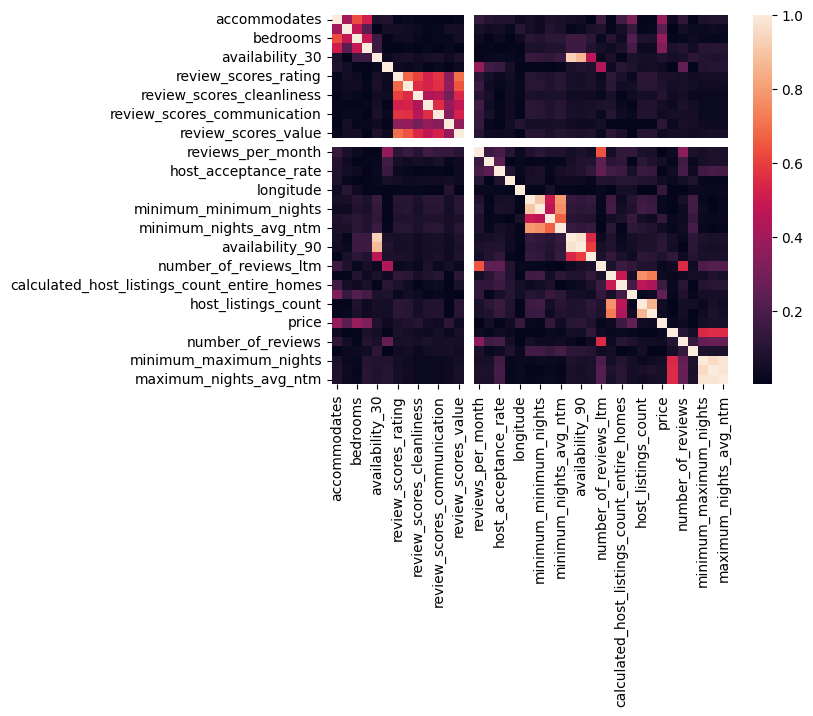

In [13]:
Heat_Map = sns.heatmap(corr_factors1)
Heat_Map

In [14]:
#Gráficas de Variables a Analizar
data_results = data_cuant[['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'reviews_per_month', 'price']]
data_results.head(3)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
0,100.00,88.0,6.0,2.00,0.41,1652.00
1,98.44,91.0,1.0,2.00,1.70,1086.68
2,100.00,92.0,17.0,2.95,0.42,1086.68


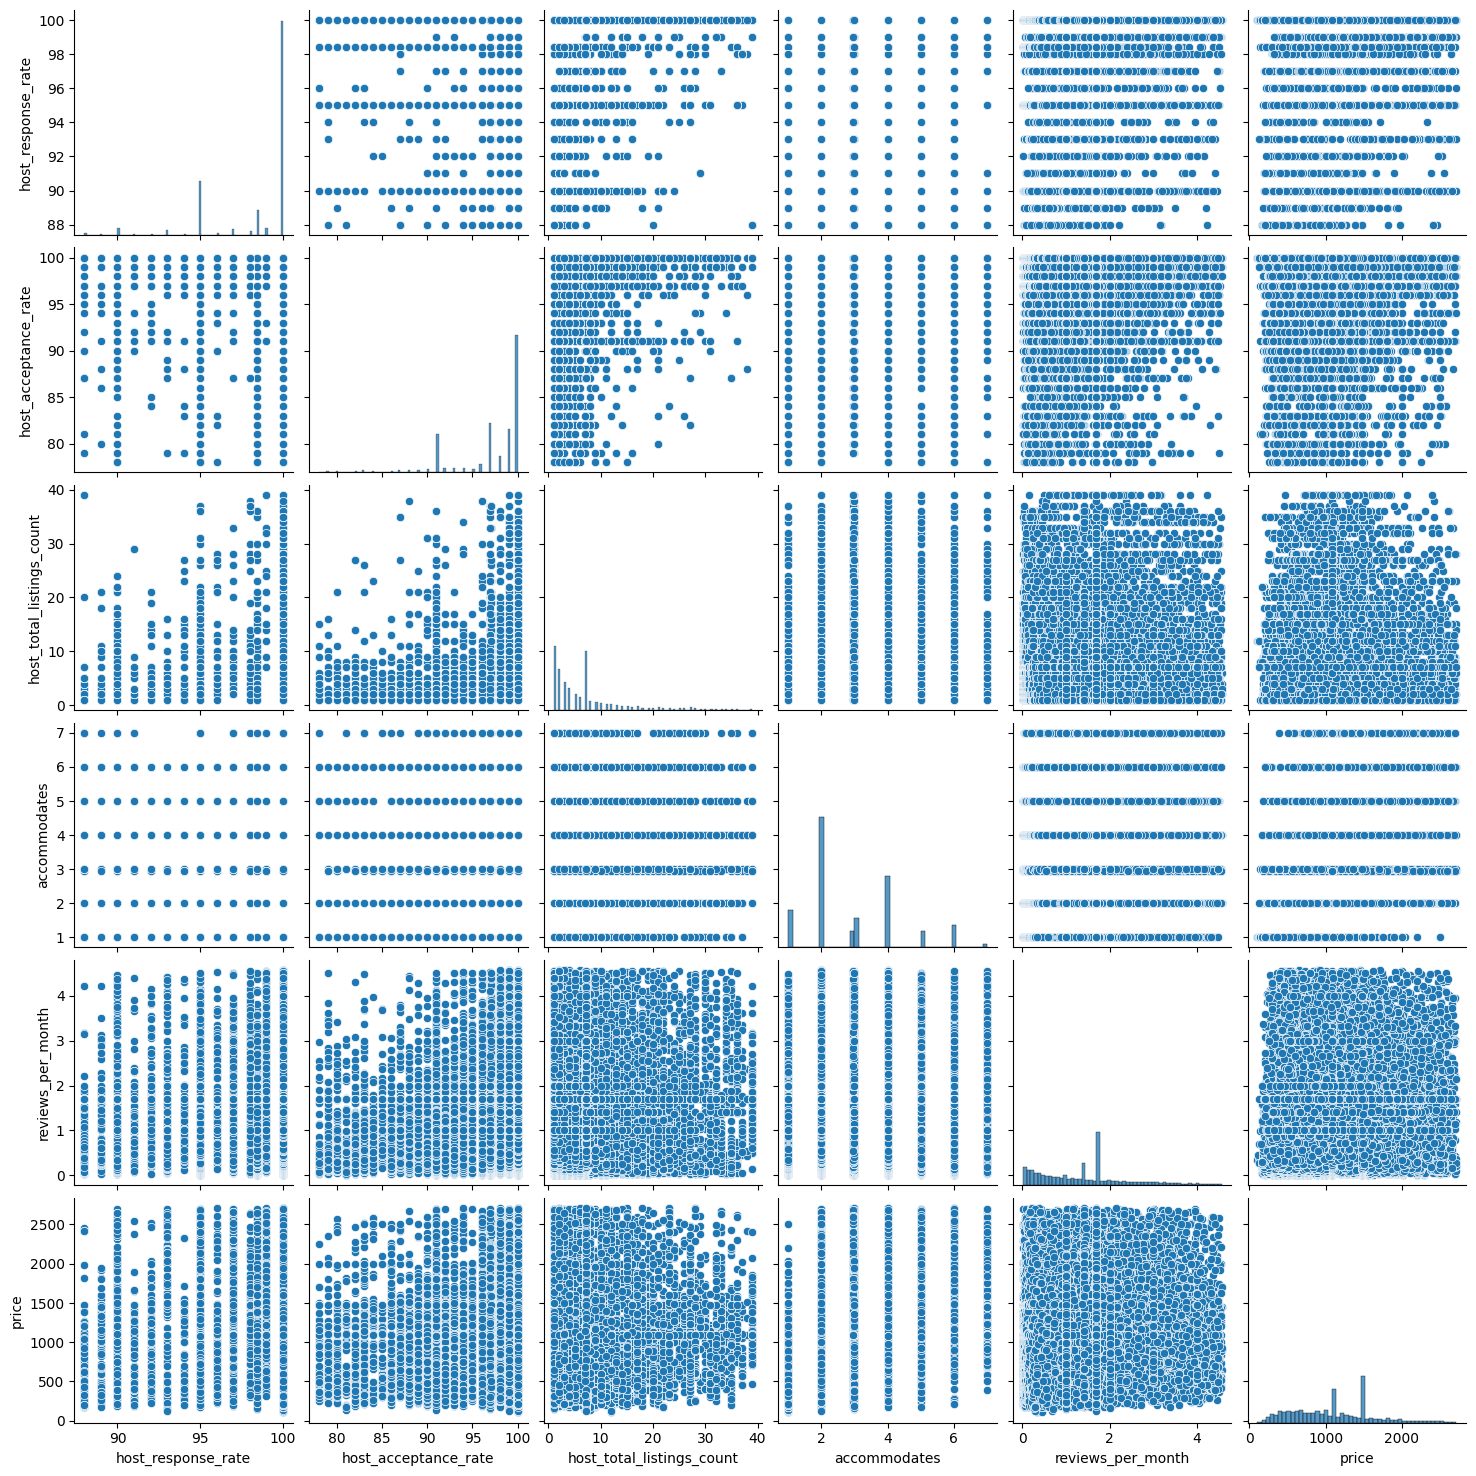

In [15]:
sns.pairplot(data_results)

#    y = ax^2 + bx + c   ("Función cuadrática")

#    y = a*exp(-bx) + c   ("Función exponencial")

#    y = 1/a*x           ("Función inversa")

#    y = a*np.sin(x) + b ("Función senoidal")

#    y = a*np.tan(x) + b ("Función tangencial")

#    y = a*np.abs(x) + b*x + c (Función Valor absoluto)

#    y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

#    y = a*np.log(x) + b  (Función logaritmica)

#    y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

#    y = 1/a*x**2  (Función cuadrática inversa)

#    y = a/b*x**2 + c*x (Función polinomial inversa)

In [16]:
#Host Response Rate
x_1 = data_cuant[['availability_365']]
y_1 = data_cuant[['host_response_rate']]

In [17]:
#Modelo 1
def func_1A(x,a,b,c):
  return a*x**2 + b*x + c

In [18]:
parametros_1A, covs_1A = curve_fit(func_1A, data_cuant['availability_365'], data_cuant['host_response_rate'], maxfev=5000)

In [19]:
y_pred_1A = func_1A(x_1, *parametros_1A)

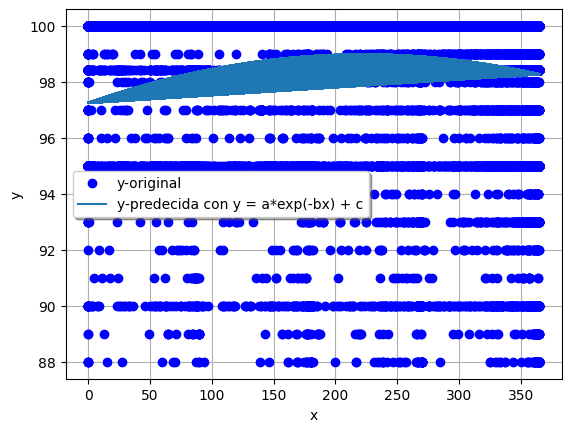

In [20]:
plt.plot(x_1,y_1, 'bo', label='y-original')
plt.plot(x_1,y_pred_1A, label='y-predecida con y = a*exp(-bx) + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [21]:
r2_modelo_1A = r2_score(y_1, y_pred_1A)
r2_modelo_1A

0.03397565582199147

In [22]:
r_1A = np.sqrt(abs(r2_modelo_1A))
r_1A

0.1843248649043082

In [23]:
#Modelo 2
def func_1B(x,a,b,c):
  return a*np.abs(x) + b*x + c

In [24]:
parametros_1B, covs_1B = curve_fit(func_1B, data_cuant['availability_365'], data_cuant['host_response_rate'], maxfev=5000)

In [25]:
y_pred_1B = func_1B(x_1, *parametros_1B)

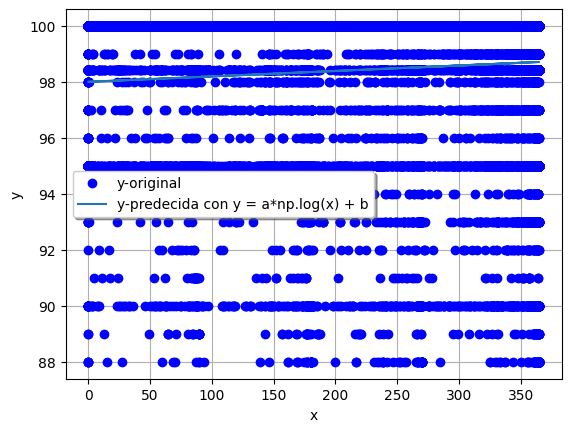

In [26]:
plt.plot(x_1,y_1, 'bo', label='y-original')
plt.plot(x_1,y_pred_1B, label='y-predecida con y = a*np.log(x) + b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [27]:
r2_modelo_1B = r2_score(y_1, y_pred_1B)
r2_modelo_1B

0.008404851695347437

In [28]:
r_1B = np.sqrt(abs(r2_modelo_1B))
r_1B

0.09167797824640025

In [29]:
#Host Acceptance Rate
x_2 = data_cuant[['maximum_minimum_nights']]
y_2 = data_cuant[['host_acceptance_rate']]

In [30]:
#Modelo 1
def func_2A(x,a,b,c):
  return a*x**2 + b*x + c

In [31]:
parametros_2A, covs_2A = curve_fit(func_2A, data_cuant['maximum_minimum_nights'], data_cuant['host_acceptance_rate'], maxfev=5000)

In [32]:
y_pred_2A = func_2A(x_2, *parametros_2A)

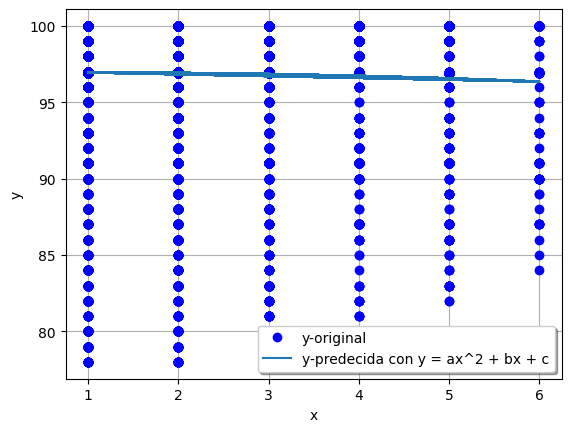

In [33]:
plt.plot(x_2,y_2, 'bo', label='y-original')
plt.plot(x_2,y_pred_2A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [34]:
r2_modelo_2A = r2_score(y_2, y_pred_2A)
r2_modelo_2A

0.00045671562179760983

In [35]:
r_2A = np.sqrt(abs(r2_modelo_2A))
r_2A

0.02137090596576593

In [36]:
#Modelo 2
def func_2B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [37]:
parametros_2B, covs_2B = curve_fit(func_2B, data_cuant['maximum_minimum_nights'], data_cuant['host_acceptance_rate'], maxfev=5000)

In [38]:
y_pred_2B = func_2B(x_2, *parametros_2B)

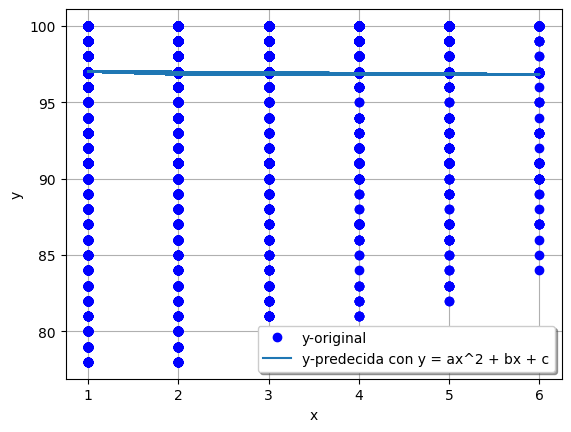

In [39]:
plt.plot(x_2,y_2, 'bo', label='y-original')
plt.plot(x_2,y_pred_2B, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [40]:
r2_modelo_2B = r2_score(y_2, y_pred_2B)
r2_modelo_2B

0.00043220108866626195

In [41]:
r_2B = np.sqrt(abs(r2_modelo_2B))
r_2B

0.020789446569504006

In [42]:
#Host Total Listings Count
x_3 = data_cuant[['calculated_host_listings_count']]
y_3 = data_cuant[['host_total_listings_count']]

In [43]:
#Modelo 1
def func_3A(x,a,b,c):
  return a*x**2 + b*x + c

In [44]:
parametros_3A, covs_3A = curve_fit(func_3A, data_cuant['calculated_host_listings_count'], data_cuant['host_total_listings_count'], maxfev=5000)

In [45]:
y_pred_3A = func_3A(x_3, *parametros_3A)

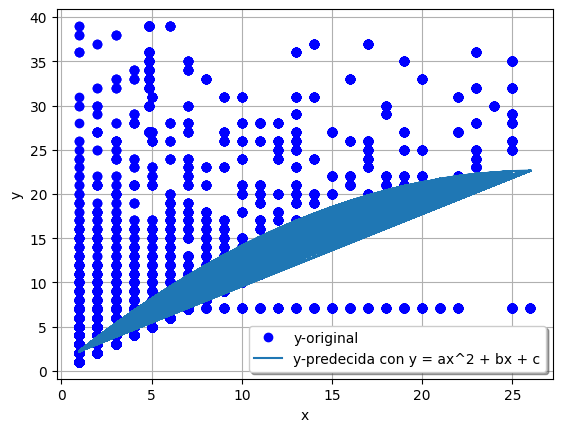

In [46]:
plt.plot(x_3,y_3, 'bo', label='y-original')
plt.plot(x_3,y_pred_3A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [47]:
r2_modelo_3A = r2_score(y_3, y_pred_3A)
r2_modelo_3A

0.5463476080905407

In [48]:
r_3A = np.sqrt(abs(r2_modelo_3A))
r_3A

0.7391533048634368

In [49]:
#Modelo 2
def func_3B(x,a,b,c):
  return a*np.abs(x) + b*x + c

In [50]:
parametros_3B, covs_3B = curve_fit(func_3B, data_cuant['calculated_host_listings_count'], data_cuant['host_total_listings_count'], maxfev=5000)

In [51]:
y_pred_3B = func_3B(x_3, *parametros_3B)

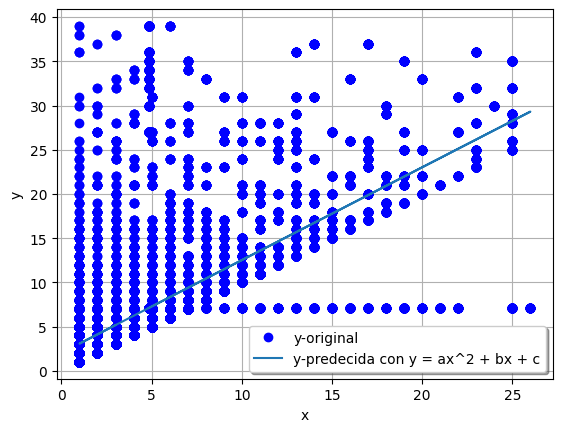

In [52]:
plt.plot(x_3,y_3, 'bo', label='y-original')
plt.plot(x_3,y_pred_3B, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [53]:
r2_modelo_3B = r2_score(y_3, y_pred_3B)
r2_modelo_3B

0.5234964374074685

In [54]:
r_3B = np.sqrt(abs(r2_modelo_3B))
r_3B

0.7235305366102169

In [55]:
#Accommodates
x_4 = data_cuant[['bedrooms']]
y_4 = data_cuant[['accommodates']]

In [56]:
#Modelo 1
def func_4A(x,a,b,c):
  return a*x**2 + b*x + c

In [57]:
parametros_4A, covs_4A = curve_fit(func_4A, data_cuant['bedrooms'], data_cuant['accommodates'], maxfev=5000)

In [58]:
y_pred_4A = func_4A(x_4, *parametros_4A)

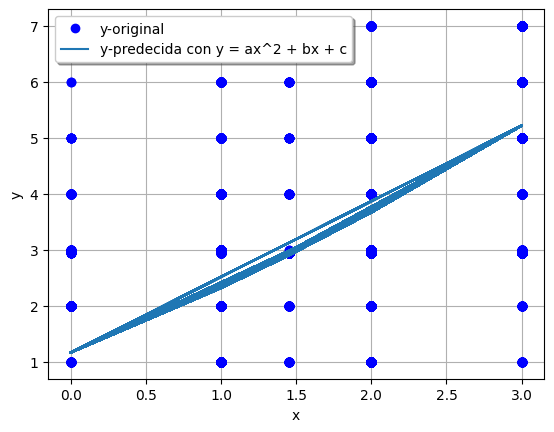

In [59]:
plt.plot(x_4,y_4, 'bo', label='y-original')
plt.plot(x_4,y_pred_4A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [60]:
r2_modelo_4A = r2_score(y_4, y_pred_4A)
r2_modelo_4A

0.3937298109295041

In [61]:
r_4A = np.sqrt(abs(r2_modelo_4A))
r_4A

0.6274789326579053

In [62]:
#Modelo 2
def func_4B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [63]:
parametros_4B, covs_4B = curve_fit(func_4B, data_cuant['bedrooms'], data_cuant['accommodates'], maxfev=5000)

In [64]:
y_pred_4B = func_4B(x_4, *parametros_4B)

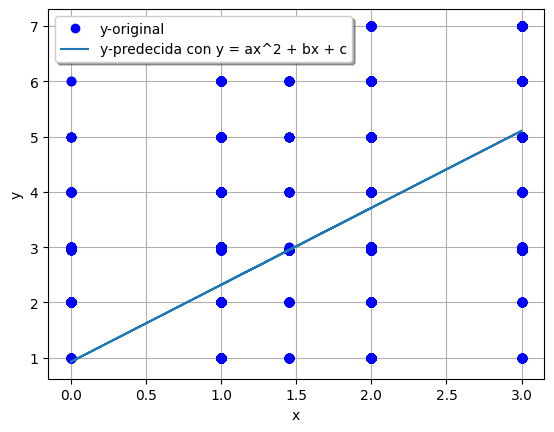

In [65]:
plt.plot(x_4,y_4, 'bo', label='y-original')
plt.plot(x_4,y_pred_4B, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [66]:
r2_modelo_4B = r2_score(y_4, y_pred_4B)
r2_modelo_4B

0.3924996576107139

In [67]:
r_4B = np.sqrt(abs(r2_modelo_4B))
r_4B

0.6264979310506252

In [68]:
#Reviews Per Month
x_5 = data_cuant[['number_of_reviews_l30d']]
y_5 = data_cuant[['reviews_per_month']]

In [69]:
#Modelo 1
def func_5A(x,a,b,c):
  return a*x**2 + b*x + c

In [70]:
parametros_5A, covs_5A = curve_fit(func_5A, data_cuant['number_of_reviews_l30d'], data_cuant['reviews_per_month'], maxfev=5000)

In [71]:
y_pred_5A = func_5A(x_5, *parametros_5A)

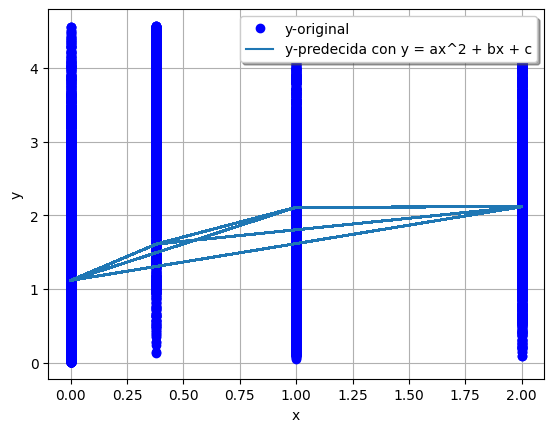

In [72]:
plt.plot(x_5,y_5, 'bo', label='y-original')
plt.plot(x_5,y_pred_5A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [73]:
r2_modelo_5A = r2_score(y_5, y_pred_5A)
r2_modelo_5A

0.16335079307926947

In [74]:
r_5A = np.sqrt(abs(r2_modelo_5A))
r_5A

0.4041667886891122

In [75]:
#Modelo 2
def func_5B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [76]:
parametros_5B, covs_5B = curve_fit(func_5B, data_cuant['number_of_reviews_l30d'], data_cuant['reviews_per_month'], maxfev=5000)

In [77]:
y_pred_5B = func_5B(x_5, *parametros_5B)

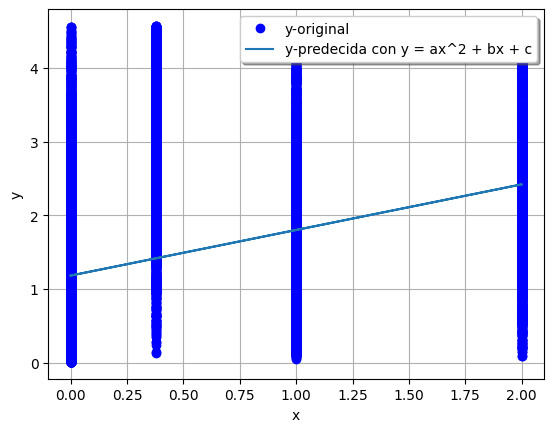

In [78]:
plt.plot(x_5,y_5, 'bo', label='y-original')
plt.plot(x_5,y_pred_5B, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [79]:
r2_modelo_5B = r2_score(y_5, y_pred_5B)
r2_modelo_5B

0.1359922559415282

In [80]:
r_5B = np.sqrt(abs(r2_modelo_5B))
r_5B

0.36877127862881104

In [81]:
#Price
x_6 = data_cuant[['accommodates']]
y_6 = data_cuant[['price']]


In [82]:
#Modelo 1
def func_6A(x,a,b,c):
  return a*x**2 + b*x + c

In [83]:
parametros_6A, covs_6A = curve_fit(func_6A, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)

In [84]:
y_pred_6A = func_6A(x_6, *parametros_6A)

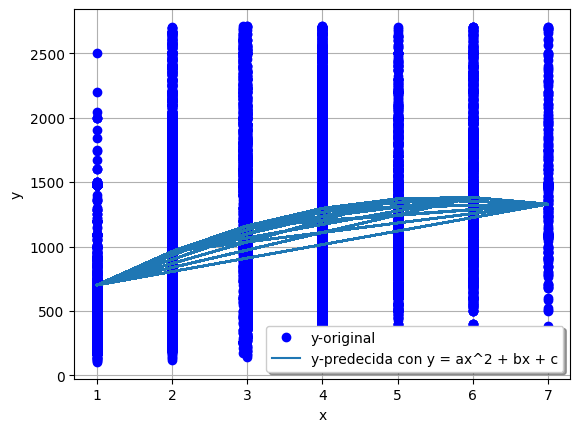

In [85]:
plt.plot(x_6,y_6, 'bo', label='y-original')
plt.plot(x_6,y_pred_6A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [86]:
r2_modelo_6A = r2_score(y_6, y_pred_6A)
r2_modelo_6A

0.1567397471976143

In [87]:
r_6A = np.sqrt(abs(r2_modelo_6A))
r_6A

0.3959037095022151

In [88]:
#Modelo 2
def func_6B(x,a,b,c):
  return a*np.log(x) + b

In [89]:
parametros_6B, covs_6B = curve_fit(func_6B, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)

<ipython-input-89-3cb701e18fc1>:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros_6B, covs_6B = curve_fit(func_6B, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)


In [90]:
y_pred_6B = func_6B(x_6, *parametros_6B)

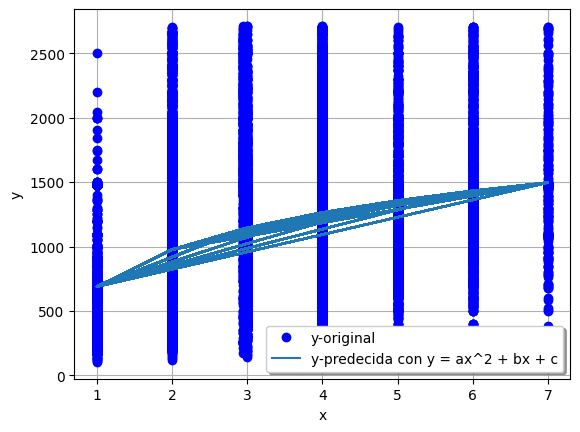

In [91]:
plt.plot(x_6,y_6, 'bo', label='y-original')
plt.plot(x_6,y_pred_6B, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [92]:
r2_modelo_6B = r2_score(y_6, y_pred_6B)
r2_modelo_6B

0.15635879658766672

In [93]:
r_6B = np.sqrt(abs(r2_modelo_6B))
r_6B

0.395422301581065

In [94]:
#Tabla de Coeficientes de Determinación y Correlación
coef_data = {'Coef_Deter':[r2_modelo_1A,r2_modelo_1B,r2_modelo_2A,r2_modelo_2B,r2_modelo_3A,r2_modelo_3B,r2_modelo_4A,r2_modelo_4B,r2_modelo_5A,r2_modelo_5B,r2_modelo_6A,r2_modelo_6B],
             'Coef_Correl':[r_1A,r_1B,r_2A,r_2B,r_3A,r_3B,r_4A,r_4B,r_5A,r_5B,r_6A,r_6B]}

df_coef_result = pd.DataFrame(coef_data,index=['Host_Response_Rate_M1','Host_Response_Rate_M2','Host_Acceptance_Rate_M1','Host_Acceptance_Rate_M2','Host_Total_Listings_Count_M1','Host_Total_Listings_Count_M2','Accommodates_M1','Accommodates_M2','Reviews_Per_Month_M1','Reviews_Per_Month_M2','Price_M1','Price_M2'])
df_coef_result

,Coef_Deter,Coef_Correl
Host_Response_Rate_M1,0.033976,0.184325
Host_Response_Rate_M2,0.008405,0.091678
Host_Acceptance_Rate_M1,0.000457,0.021371
Host_Acceptance_Rate_M2,0.000432,0.020789
Host_Total_Listings_Count_M1,0.546348,0.739153
Host_Total_Listings_Count_M2,0.523496,0.723531
Accommodates_M1,0.393730,0.627479
Accommodates_M2,0.392500,0.626498
Reviews_Per_Month_M1,0.163351,0.404167
Reviews_Per_Month_M2,0.135992,0.368771
